In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Decision Tree

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/EtaiE1/CPSCFinalProject/main/DataFinal.csv")
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [ ]:
artistDummies = pd.get_dummies(df["artist"])
topGenreDummies = pd.get_dummies(df["top genre"])

df = pd.concat([df, artistDummies], axis = 1)
df = pd.concat([df, topGenreDummies], axis = 1)

df = df[["title","artist","top genre","year released","added","bpm","nrgy","dnce","dB","live","val","dur","acous","spch","pop","top year","artist type"]]
df.head(100)


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,0,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,0,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,0,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,0,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,0,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,OMG (feat. will.i.am),Usher,atl hip hop,2010,2022‑02‑17,130,75,78,-6,36,33,269,20,3,78,0,2010,Solo
96,Hey Daddy (Daddy's Home),Usher,atl hip hop,2010,2022‑02‑17,96,70,59,-4,11,35,224,0,3,65,0,2010,Solo
97,No Hands (feat. Roscoe Dash & Wale),Waka Flocka Flame,atl hip hop,2010,2022‑02‑17,131,60,76,-6,24,36,264,1,4,63,0,2010,Solo
98,We No Speak Americano (Edit),Yolanda Be Cool,australian dance,2020,2022‑02‑17,125,81,90,-5,9,75,157,7,5,65,0,2010,Duo


# 1

R2 (Train): 14.555208184951791
R2 (Test): -0.012838976215858944


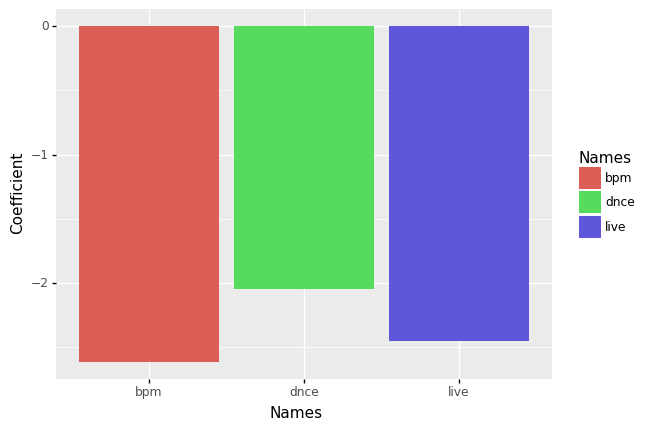

<ggplot: (8772481555301)>

In [ ]:
predictor = ["bpm", "live", "dnce"]


X_train, X_test, y_train, y_test = train_test_split(df[predictor], df["acous"], test_size = 0.2)

#Z-score
z = StandardScaler()
z.fit(X_train)
Xz_test = z.transform(X_test)
Xz_train = z.transform(X_train)


# create and fit
model = LinearRegression()
model.fit(X_train, y_train)

# set up X and y
X = df[predictor]
y = df["acous"]

#z score
z.fit(X)
Xz = z.transform(X)

# create model
LR_Model = LinearRegression()

# fit model
LR_Model.fit(Xz, y)

# predict
react_pred = LR_Model.predict(Xz)

# make residual plot
assump = pd.DataFrame({"error": y - react_pred, "predicted": react_pred})
assump.head()

#actual vs predicted reaction times for train set

#prediction for train set
y_pred_train = model.predict(X_train)

#training R2
model.score(X_train, y_train)


true_vs_pred_train = pd.DataFrame({"actual": y_train,
                             "predicted": y_pred_train})

print("R2 (Train):", mean_absolute_error(y_train, y_pred_train))


y_pred_test = model.predict(X_test)

#testing R2
model.score(X_test, y_test)
true_vs_pred_test = pd.DataFrame({"actual": y_test,
                             "predicted": y_pred_test})

#R2
print("R2 (Test):", r2_score(y_test, y_pred_test))

coefficients = pd.DataFrame({"Coefficient": LR_Model.coef_,
                             "Names": predictor})
coefficients
(ggplot(coefficients, aes(x = "Names", y = "Coefficient", fill = "Names")) + geom_bar(stat = "identity"))

First, I stored my variables into dummy variables. Then I did the train test split and do the z score. I test and predicted my models. I did R2 for the train and test momdels. I graph the coefficient scores for my predictors (bpm,dnce, height). bpm, dnce, height, and live have negative relationship with acous. dnce's relationship is closer to zero compare to the other predictors. The strongest predictor is dnce which means that it improves the most when predicting acous.

# 2.

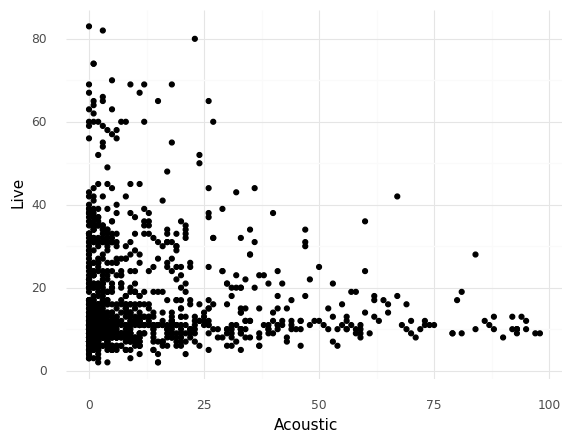

<ggplot: (8772481487033)>

In [ ]:
(ggplot(df, aes(x = "acous", y = "live")) + geom_point() + labs(x = "Acoustic", y = "Live") + theme_minimal())


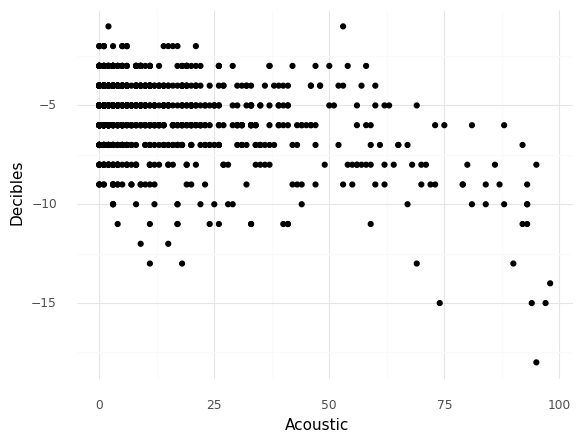

<ggplot: (8772481042429)>

In [ ]:
(ggplot(df, aes(x = "acous", y = "dB")) + geom_point() + labs(x = "Acoustic", y = "Decibles") + theme_minimal())


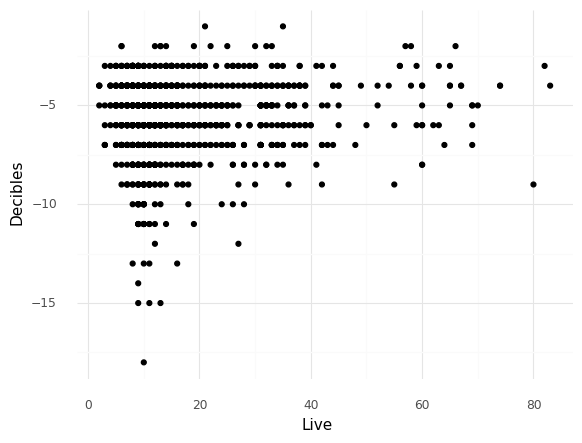

<ggplot: (8772481003737)>

In [ ]:
(ggplot(df, aes(x = "live", y = "dB")) + geom_point() + labs(x = "Live", y = "Decibles") + theme_minimal())


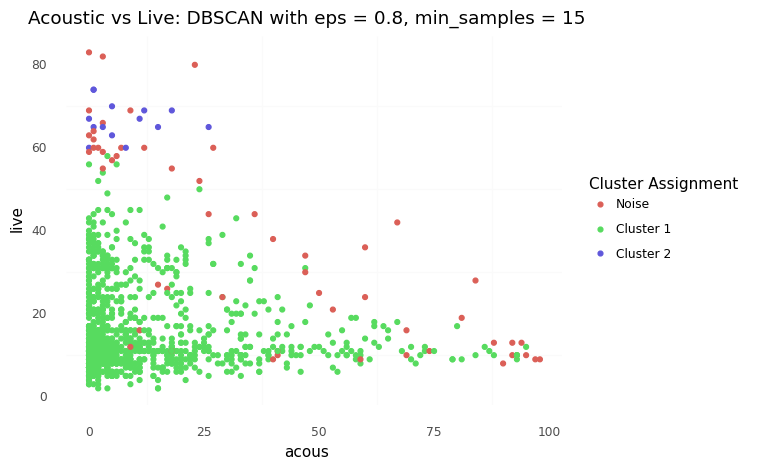

<ggplot: (8772481052669)>

In [ ]:
z = StandardScaler()
spot = df[["acous","live", "dB"]]
z_spot = z.fit_transform(spot)
db_spot = DBSCAN(eps = 0.8, min_samples = 15).fit(z_spot)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db_spot.labels_)))]

spot["assignments"] = db_spot.labels_

(ggplot(spot, aes(x = "acous", y = "live", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Acoustic vs Live: DBSCAN with eps = 0.8, min_samples = 15"))

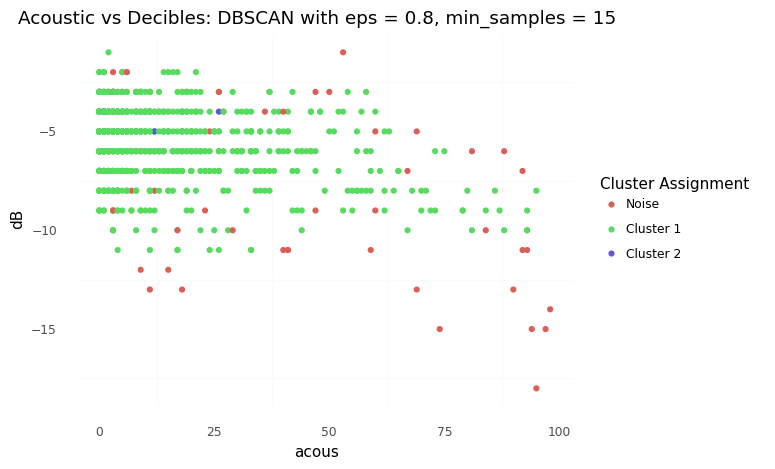

<ggplot: (8772483175625)>

In [ ]:
(ggplot(spot, aes(x = "acous", y = "dB", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Acoustic vs Decibles: DBSCAN with eps = 0.8, min_samples = 15"))

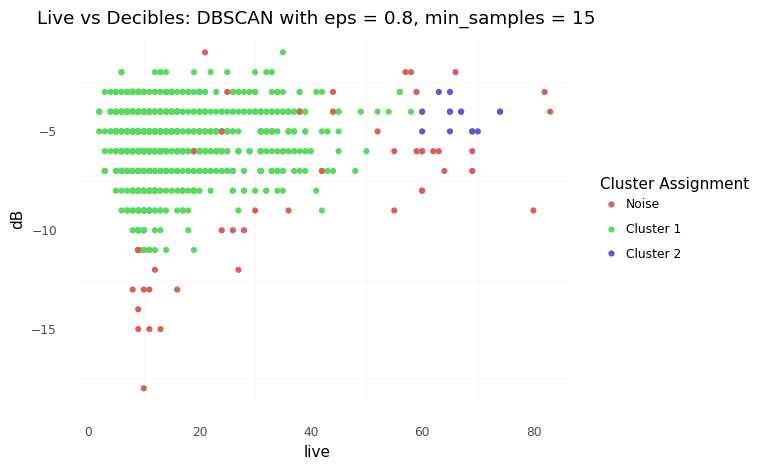

<ggplot: (8772480869637)>

In [ ]:
(ggplot(spot, aes(x = "live", y = "dB", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Live vs Decibles: DBSCAN with eps = 0.8, min_samples = 15"))

In [ ]:
spotify_clustered = spot.loc[(spot.assignments >= 0)]
# overall
print("DBSCAN Silhouette Score: ", silhouette_score(spotify_clustered[["acous","live", "dB"]], spotify_clustered["assignments"]))

DBSCAN Silhouette Score:  0.55927817446356


For this model, all I did is a DBSCAN and graphing. Based on the silhouette score, our models did not do well with DBSCAN. This means that our model did not do well. I feel like that the clusters that really emerged is the noise cluster.